![logo.jpg](logo.jpg) 
### Report photométrique de l'étoile variable ***V1492 Cyg***<br>

###### Dominique Touzan.
###### 1. https://sites.google.com/view/astronomie-ut1/accueil
###### 2. dtouzan@gmail.com
###### 3. Jupyter Notebook : 

###### **Édition**   1.0, révision 21/10/2019 

##### **Résumé** : 

###### ***Mots-clés*** : Etoile variable - Photométrie - Astropy - Jupyter
[![astropy](http://img.shields.io/badge/powered%20by-AstroPy-orange.svg?style=flat)](http://www.astropy.org/)

### I. Positions des prises de vue de l'observatoire UT1 sur une projection Aitoff.
##### Les marqueurs indiquent les positions des différentes images prise à l'observatoire. Un fichier au format MAST **(mast.stsci.edu)** est lu et mis en forme pour reporter les observations indiquées en bleu, un autre fichier lui reporte différentes constellations ainsi que la LMC et SMC.

In [3]:
# Date    :04/09/2019
# Autheur :Dominique Touzan, dtouzan@gmail.com
# Importation des modules
#           numpy       : Informatique scientifique 
#           matplotlib  : Mathématique,dessin
#           datetime    : Temps
#           astropy     : Astronomie
#           aplpy       : Astronomie
#           astroplan   : Astronomie
#
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime

from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.table as vstack
from astropy.io import ascii
from astropy.visualization import astropy_mpl_style
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import get_sun, get_moon
from astropy.utils import iers
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import aplpy
#import astroplan
#from astroplan import download_IERS_A

# Configuration des éphémérides
#download_IERS_A()

# Configuration pour le cache IERS
iers.conf.auto_download = False 

# Configuration du style de dessin
plt.style.use(astropy_mpl_style)

In [4]:
# Importation des fichiers de données
#           UT1_MAST_CATALOG       : Catalogue UT1 Mast
#           data_milky_way         : Catalogue d'étoiles
#           data_SMCLMC            : Catalogue SMC LMC
#           data_AAVSO             : Mesures AAVSO
data = ascii.read("UT1_MAST_CATALOG.csv",data_start=3,format='csv')
data_milky_way = ascii.read("data_Milky_Way.csv",data_start=1,format='csv')
data_SMCLMC = ascii.read("data_SMCLMC.csv",data_start=1,format='csv')
data_v1492cyg_UT1 = ascii.read("v1492cyg_UT1.csv",data_start=1,format='csv')
data_AAVSO_1492 = ascii.read("v1492cyg_AAVSO.csv",data_start=1,format='csv')

# Longitude et latitude de UT1
coord_ut1=EarthLocation(lat=49.5888*u.deg,lon=-0.35*u.deg,height=100*u.m) 

# Décalage horaire
utcoffset = 2*u.hour

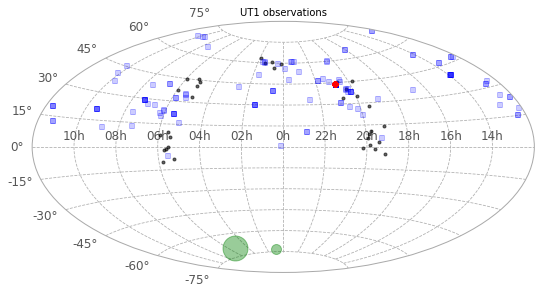

In [16]:
# Objet rechrercher dans le catalogue UT1 Mast
data_search='v1492 Cyg'

# Configuration du dessin
fig = plt.figure(figsize=(9,5))
# Configuration de la projecion cartographique du titre et grille 
ax = fig.add_subplot(111,projection='aitoff')
plt.grid(True,axis='both',linestyle='--')
plt.title('UT1 observations', fontsize=10)

# Dessin des constellations
for ligne in data_milky_way:
    # RA et DEC en degré 
    ra=ligne[0]*u.deg
    dec=ligne[1]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
     # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    plt.plot(ra_rad, dec_rad, 'o', color='black', markersize=3, alpha=0.6)

# Lecture des données du catalogue UT1 Mast    
for ligne in data:
    if ligne[7]!=data_search:
        marker_color='blue'
        marker_type='s'
        marker_alpha=0.2
        marker_label=''
        # RA et DEC en degré    
        ra=ligne[10]*u.deg
        dec=ligne[11]*u.deg
        # Configuration de la position en ICRS
        c = SkyCoord(ra, dec, frame='icrs')
        # RA et DEC en radian et repositionnement
        ra_rad = -c.ra.wrap_at(180 * u.deg).radian
        dec_rad = c.dec.radian
        # Affichage sur la projection
        plt.plot(ra_rad, dec_rad, marker=marker_type, color=marker_color, markersize=5, alpha=marker_alpha)

# Lecture des données du catalogue UT1 Mast    
for ligne in data:
    if ligne[7]==data_search:
        marker_color='red'
        marker_alpha=0.8
        marker_label=''
        marker_type='o'
        # RA et DEC en degré
        ra=ligne[10]*u.deg
        dec=ligne[11]*u.deg
        # Configuration de la position en ICRS
        c = SkyCoord(ra, dec, frame='icrs')
        # RA et DEC en radian et repositionnement
        ra_rad = -c.ra.wrap_at(180 * u.deg).radian
        dec_rad = c.dec.radian
        # Affichage sur la projection
        plt.plot(ra_rad, dec_rad, marker=marker_type, color=marker_color, markersize=5, alpha=marker_alpha)

# Dessin des SMC LMC
for ligne in data_SMCLMC:
    name=ligne[2]
    # RA et DEC en degré 
    ra=ligne[0]*u.deg
    dec=ligne[1]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
     # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    if name == "smc":
        marker_size=10
    else:
        marker_size=25
    plt.plot(ra_rad, dec_rad, 'o', color='green', markersize=marker_size, alpha=0.4)
    
# Modification des labels en heure
ax.set_xticklabels(['10h','08h','06h','04h','02h','0h','22h','20h','18h','16h','14h'])
# Affichage
plt.show()

###### ***Fig. 1.*** La marque rouge indique la position de l'étoile variable 

### II. Hauteurs de l'étoile variable à l'observatoire UT1
##### La hauteur de v1492 Cyg vers 0h UT est proche du zénith, la constellation du cygne est bien accéssible pour le site cependant certaines soirées sont délicates car le temps ne se prête guère à l'observation et la Lune ne permet pas de bonnes prise de vue quand celle ci est illuminée au dessus de 50%.

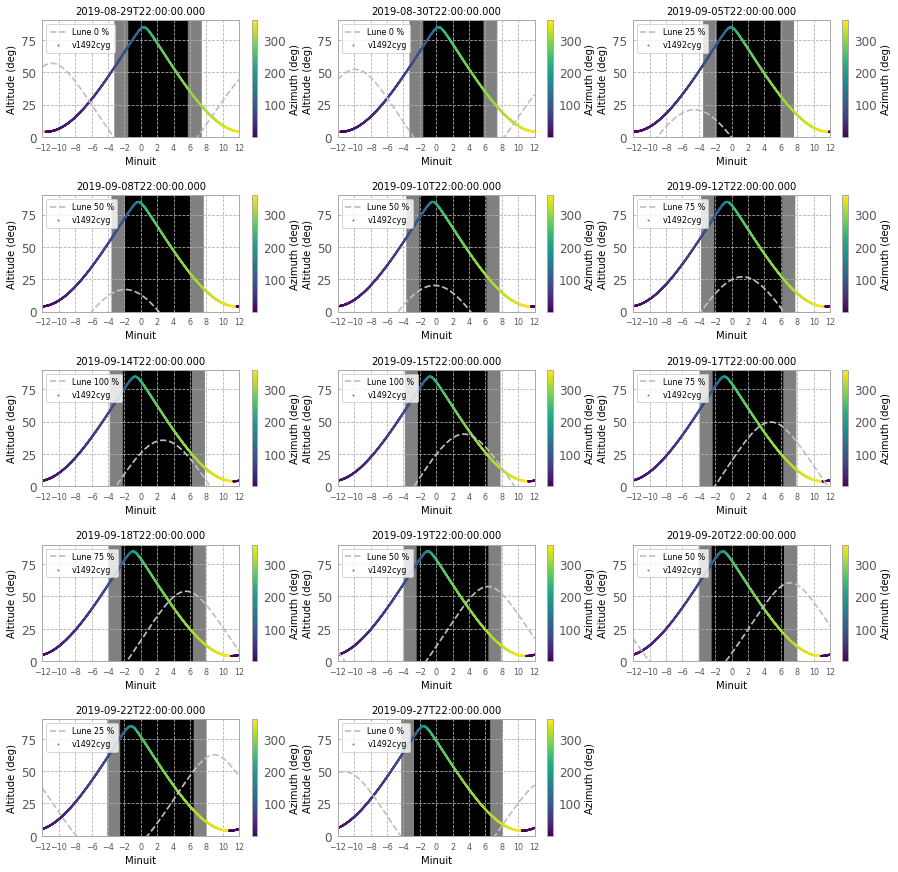

In [28]:
# Affichage des hauteurs
#       Example gallery            : astropy
# Ajout de l'illumination de la Lune 
# Nom de l'astre rechercher au CDS
name_astre='v1492cyg'

# Dates de l'observation
dates_obs = ['2019-08-30T00:00:00','2019-08-31T00:00:00','2019-09-06T00:00:00','2019-09-09T00:00:00',
             '2019-09-11T00:00:00','2019-09-13T00:00:00','2019-09-15T00:00:00','2019-09-16T00:00:00',
             '2019-09-18T00:00:00','2019-09-19T00:00:00','2019-09-20T00:00:00','2019-09-21T00:00:00',
             '2019-09-23T00:00:00','2019-09-28T00:00:00']
# soirées de l'observation à minnuit
dates_midnight = ['2019-08-30T00:00:00','2019-08-31T00:00:00','2019-09-06T00:00:00','2019-09-09T00:00:00',
                  '2019-09-11T00:00:00','2019-09-13T00:00:00','2019-09-15T00:00:00','2019-09-16T00:00:00',
                  '2019-09-18T00:00:00','2019-09-19T00:00:00','2019-09-20T00:00:00','2019-09-21T00:00:00',
                  '2019-09-23T00:00:00','2019-09-28T00:00:00']
# % illumination de la Lune
moon_phase = [0,0,25,50,50,75,100,100,75,75,50,50,25,0]

# Valeur des coordonés de l'astre
coord_astre = SkyCoord.from_name(name_astre)

# taille du canevas
plt.figure(figsize=(15,15))

index = 0
for date in dates_obs:
    # initialisation de la date d'observation
    # module astropy
    date_observation = Time(date, format='isot', scale='utc') - utcoffset
    midnight = Time(dates_midnight[index], format='isot', scale='utc') - utcoffset
    # Azimuth et hauteur de l'astre
    # module astropy
    astre_altaz = coord_astre.transform_to(AltAz(obstime=date_observation,location=coord_ut1))
    # Azimuth et hauteur du Soleil
    # module astropy
    delta_midnight = np.linspace(-12, 12, 2000)*u.hour
    times_dates = midnight + delta_midnight
    frame_dates = AltAz(obstime=times_dates, location=coord_ut1)
    sunaltazs_dates = get_sun(times_dates).transform_to(frame_dates)
    # Azimuth, hauteur
    # module astropy
    # Illumination de la Lune module astroplan
    moon_dates = get_moon(times_dates)
    moonaltazs_dates = moon_dates.transform_to(frame_dates)
    #k=int(astroplan.moon_illumination(date_observation)*100)
    k=moon_phase[index]
    # Azimuth et hauteur de l'astre
    # module astropy
    astrealtazs_dates = astre_altaz.transform_to(frame_dates)
    #
    # Dessin 
    #
    plt.subplot(5, 3, index+1)
    plt.grid(True,axis='both',linestyle='--')
    # Tracé de la Lune, couleur et label avec % d'illumination
    plt.plot(delta_midnight, moonaltazs_dates.alt, color=[0.75]*3, ls='--', label='Lune '+str(k)+' %')
    # Tracé de l'astre, label et couleur
    plt.scatter(delta_midnight, astrealtazs_dates.alt,c=astrealtazs_dates.az, label=name_astre, lw=1, s=1,cmap='viridis') 
    # tracé de la nuit (pénombre)
    plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -0*u.deg, color='0.5', zorder=0)
    # Tracé de la nuit total
    plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -15*u.deg, color='k', zorder=0)
    # Trace du titre
    plt.title(str(date_observation), fontsize=10)
    # Tracé du label "Azimuh"
    plt.colorbar().set_label('Azimuth (deg)', fontsize=10)
    # tracé des légendes
    plt.legend(loc='upper left', fontsize=8)
    # Tracé de la grille Horaire
    plt.xlim(-12, 12)
    plt.xticks(np.arange(13)*2 -12,fontsize=8)
    # Tracé de la grille d'altitude
    plt.ylim(0, 90)
    # Tracé du label "Minuit" sur axe X
    plt.xlabel('Minuit', fontsize=10)
    # Tracé du label "Altitude"
    plt.ylabel('Altitude (deg)', fontsize=10)
    index = index+1

# Affichage
plt.show()

###### ***Fig. 2.*** Hauteur de v2492 Cyg et illumination et hauteur de la Lune pour les quatorze soirées.

### III. Repérage de l'étoile variable dans la nébuleuse IC 5070 (Nébuleuse du Pélican).
##### Pour indiquer le repérage les images des soirées ont d'abord été calibrées avec le logiciel **Iris** puis additionées (addition de 69 images de 180 secondes du 29 et 30 septembre 2019) puis avec le logiciel **Aladin Sky Atlas** une calibration astrométrique est appliquée pour indiquer les coordonées **WCS**. 

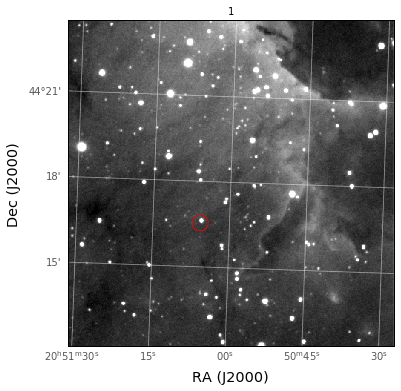

In [5]:
# Coordonées Aladin Sky Atlas
# Intitulée v1492 cyg
coord_astre = SkyCoord.from_name('v1492cyg')
v_ra = coord_astre.ra*u.deg
v_dec = coord_astre.dec*u.deg

data_image = [['v1490cyg-20190829.fits',15000,25000,'1']]

# Affichage des images de référence
# Marquage de la variable
fig = plt.figure(figsize=(15,15))
index = 0
for line in data_image:
    f1=aplpy.FITSFigure(data_image[index][0],figure=fig, subplot=(2,2,index+1))
    f1.add_grid()
    f1.tick_labels.set_font(size='small')
    f1.show_markers(v_ra, v_dec, edgecolor='red', facecolor='none', marker='o', s=250, alpha=0.8)
    f1.show_grayscale(vmin=data_image[index][1], vmax=data_image[index][2])
    plt.title(data_image[index][3],fontsize=10)
    index = index + 1

fig.canvas.draw()

MJD		 Mv	 Band
V* 1492 Cyg	 -----	 ------

58724.84861	 15.33	 CLS
58725.85972	 15.26	 CLS
58731.83333	 15.67	 CLS
58734.82501	 15.42	 CLS
58736.83055	 15.77	 CLS
58738.82847	 15.48	 CLS
58740.8111	 16.44	 CLS
58741.80763	 16.26	 CLS
58743.80972	 15.65	 CLS
58744.80972	 15.47	 CLS
58745.80694	 15.37	 CLS
58746.80625	 15.66	 CLS
58748.80001	 15.51	 CLS



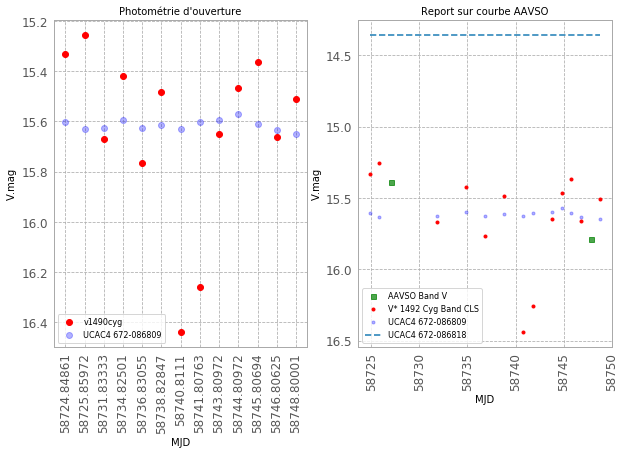

In [24]:
###### Calcul de la magnitude

# Affichage des magnitudes calculées
indice = 0.15
Vmag = []
Cmag = []
C2mag = []
mjd = []
print('MJD\t\t Mv\t Band')
print('V* 1492 Cyg\t -----\t ------')
print()

for line in data_v1492cyg_UT1:
    name_constante = line[7]
    band = line[4]
    Vadu = float(line[24])
    Cadu = float(line[25])
    C2adu = float(line[26])
    Cmag_UCAC4 = float(line[14])
    Cmag.append(Cmag_UCAC4)
    t=Time(float(line[0]),format='jd')
    mjd.append(round(t.mjd,8))
    #
    # mag1 - mag2 = -2,5 log10 (flux1 / flux2) 
    #
    Vmag_calc = -2.5*(np.log10(Vadu/Cadu))+Cmag_UCAC4
    C2mag_calc = -2.5*(np.log10(C2adu/Cadu))+Cmag_UCAC4
    Vmag.append(Vmag_calc)
    C2mag.append(C2mag_calc)
    print(str(round(t.mjd,8))+'\t',str(round(Vmag_calc,2))+'\t',band)

print()
    
# Graph des mesures
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.gca().invert_yaxis()
plt.grid(True,axis='both',linestyle='--')
plt.plot(np.arange(len(data_v1492cyg_UT1)),Vmag,'o', color='red', label='v1490cyg')
plt.plot(np.arange(len(data_v1492cyg_UT1)),C2mag, 'o', color='blue', alpha=0.3, label='UCAC4 672-086809')
plt.legend(loc='lower left', fontsize=8)
plt.xlabel('MJD',fontsize=10)
plt.ylabel('V.mag',fontsize=10)
plt.title("Photométrie d'ouverture",fontsize=10)
plt.xticks(np.arange(len(data_v1492cyg_UT1)),mjd,rotation=90)



# Graph de la courbe AAVSO
name_AAVSO='AAVSO'
name_UT1='V* 1492 Cyg'
band='V'
band_UT1='CLS'

# Table AAVSO
x_AAVSO=[]
y_AAVSO=[]

for line in data_AAVSO_1492:
    if line[4] == band:
        t=Time(float(line[0]),format='jd')
        x_AAVSO.append(round(t.mjd,2))
        y_AAVSO.append(float(line[1]))
        
# Graph de la courbe AAVSO et report des mesures
plt.subplot(1, 2, 2)
plt.gca().invert_yaxis()
plt.grid(True,axis='both',linestyle='--')
plt.plot(x_AAVSO,y_AAVSO,'s', color='green',markersize=5, alpha=0.7,label=name_AAVSO+" Band "+band )
plt.plot(mjd,Vmag,'o', color='red',markersize=3, alpha=1,label=name_UT1+" Band "+band_UT1)
plt.plot(mjd,C2mag,'o', color='blue',markersize=3, alpha=0.3,label='UCAC4 672-086809')
plt.plot(mjd,Cmag, ls='--', label=name_constante)
plt.xlabel('MJD',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('V.mag',fontsize=10)
plt.legend(loc='lower left', fontsize=8)
plt.title("Report sur courbe AAVSO",fontsize=10)
plt.show()

#### Différence de magnitude de V* 1492 Cyg

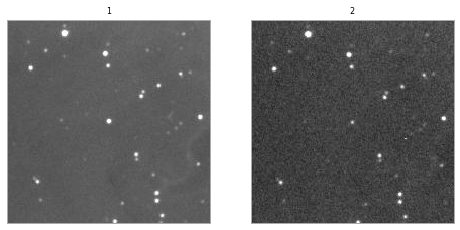

In [18]:
fig = plt.figure(figsize=(8,5))

# Nom des images jpeg
images = ['20190830','20190914']

index = 0
for image in images:
    plt.subplot(1, 2, index+1)
    # Lecture de l'image
    im = mpimg.imread( image+'.jpg')
    # Suppresion des grilles
    plt.xticks([], [])
    plt.yticks([], [])
    # Titres 1, 2
    plt.title(index+1,fontsize=8)
    # insertion des images dans le canvas
    plt.imshow(im)
    index = index + 1
# Affichage
fig.canvas.draw()

##### Deux images les plus représentatives de la différence de magnitude, chaque image est une médiane de onze images (l'étoile est au centre de l'image). La luminosité de la Lune sur la deuxième image est bien plus perceptible, celle ci dégrade la visibilité de la nébuleuse IC 5070. Le temps de pose est de 180 secondes.
###### 1. 30/08/2019 à 20h28mn
###### 2. 14/09/2019 à 21h38mn